In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip "/content/gdrive/My Drive/Brain Tumor/Brain_Tumor.zip"

Archive:  /content/gdrive/My Drive/Brain Tumor/Brain_Tumor.zip
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [5]:
# getting the count of number of images in each class: 0-Brain Tumor  1-healthy
ROOT_DIR="/content/Brain Tumor Data Set/Brain Tumor Data Set"
number_of_images={}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

In [6]:
number_of_images.items()

dict_items([('Healthy', 2087), ('Brain Tumor', 2513)])

# The data will be splitted as:
* 70% for training data
* 15% for Validation
* 15% for testing

In [7]:
# Function to create training, validation and test set.
def dataFolder(path,split):
  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+path+"/"+dir)

      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                  size=(math.floor(split*number_of_images[dir]-5)),
                                  replace=False):
       O=os.path.join(ROOT_DIR,dir,img)
       D=os.path.join("./"+path,dir)
       shutil.copy(O,D)
       os.remove(O)
  else:
    print(f"{path} already exists")

In [8]:
dataFolder("train",0.7)

In [9]:
dataFolder("val",0.15)

In [10]:
dataFolder("test",0.15)

In [11]:
# getting the count of number of images in each class: 0-Brain Tumor  1-healthy
ROOT_DIR="/content/Brain Tumor Data Set/Brain Tumor Data Set"
number_of_images={}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))
number_of_images.items()

dict_items([('Healthy', 16), ('Brain Tumor', 17)])

# Preparing the data using Data Generator

In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet, preprocess_input

In [13]:
def preprocessingImages1(path):
  '''
  Input : Path
  Output: Pre-Processed images
  '''

  image_data= ImageDataGenerator(zoom_range=0.2 , shear_range=0.2 , preprocessing_function=preprocess_input , horizontal_flip=True )
  image= image_data.flow_from_directory(directory=path , target_size=(224,224) , batch_size=32 , class_mode='binary')

  return image

In [14]:
path="/content/train"
train_data=preprocessingImages1(path)

Found 3209 images belonging to 2 classes.


In [15]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

In [16]:
def preprocessingImages2(path):
  '''
  Input : Path
  Output: Pre-Processed images
  '''

  image_data= ImageDataGenerator(preprocessing_function=preprocess_input )
  image= image_data.flow_from_directory(directory=path , target_size=(224,224) , batch_size=32 , class_mode='binary')

  return image

In [17]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [18]:
path="/content/val"
val_data=preprocessingImages2(path)

Found 679 images belonging to 2 classes.


# Model Training

In [19]:
import numpy
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model,load_model


In [20]:
base_model=MobileNet(input_shape=(224,224,3), include_top=False)

17225924/17225924 [==============================] - 0s 0us/step


In [21]:
for layer in base_model.layers:
  layer.trainable=False

In [22]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [23]:
X=Flatten()(base_model.output)
X=Dense(units=1, activation='sigmoid')(X)

model= Model(base_model.input, X)

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [25]:
import keras
model.compile(optimizer='rmsprop' , loss=keras.losses.binary_crossentropy , metrics=['accuracy'])

In [26]:
## Call Backs
from keras.callbacks import ModelCheckpoint,EarlyStopping

# Model Checkpoint
mc=ModelCheckpoint(filepath='bestmodel.h5' , monitor='val_accuracy' , verbose=1 , save_best_only=True )

#Early Checkpoint
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01 , patience=3 , verbose=1)

cb=[mc,es]

In [27]:
hist = model.fit_generator(train_data ,
                           steps_per_epoch=8 ,
                           epochs=30 ,
                           validation_data=val_data ,
                           validation_steps=16 ,
                           callbacks = cb )

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 7.6772 - accuracy: 0.5938
Epoch 1: val_accuracy improved from -inf to 0.66406, saving model to bestmodel.h5
8/8 [==============================] - 15s 753ms/step - loss: 7.6772 - accuracy: 0.5938 - val_loss: 3.7770 - val_accuracy: 0.6641
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 1.8794 - accuracy: 0.8164
Epoch 2: val_accuracy improved from 0.66406 to 0.74023, saving model to bestmodel.h5
8/8 [==============================] - 7s 973ms/step - loss: 1.8794 - accuracy: 0.8164 - val_loss: 2.2079 - val_accuracy: 0.7402
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 1.2696 - accuracy: 0.8398
Epoch 3: val_accuracy improved from 0.74023 to 0.82617, saving model to bestmodel.h5
8/8 [==============================] - 5s 724ms/step - loss: 1.2696 - accuracy: 0.8398 - val_loss: 1.3182 - val_accuracy: 0.8262
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2.5532 - accuracy:

In [28]:
# load best fit data
model = load_model('/content/bestmodel.h5')

In [29]:
acc = model.evaluate_generator(test_data)[1]
print(f'model accuracy is : {acc*100} %')

model accuracy is : 93.66715550422668 %


In [30]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

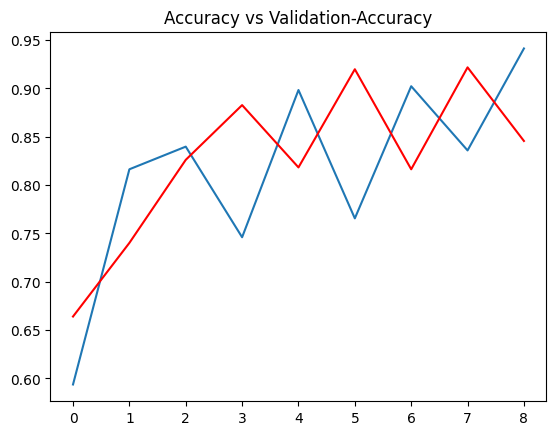

In [31]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c='red')
plt.title("Accuracy vs Validation-Accuracy")
plt.show()

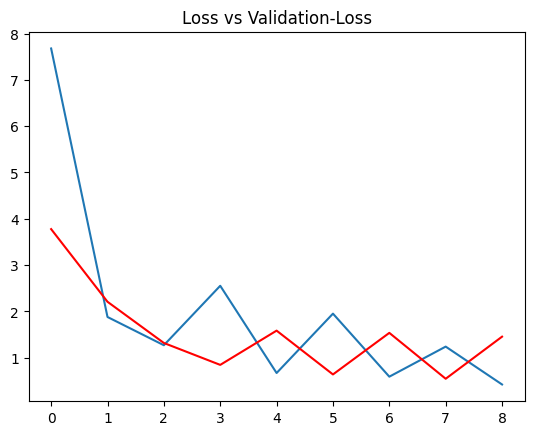

In [32]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c='red')
plt.title("Loss vs Validation-Loss")
plt.show()

In [41]:
from tensorflow.keras.utils import load_img,img_to_array

1/1 [==============================] - 0s 112ms/step
0
MRI is having a Tumor


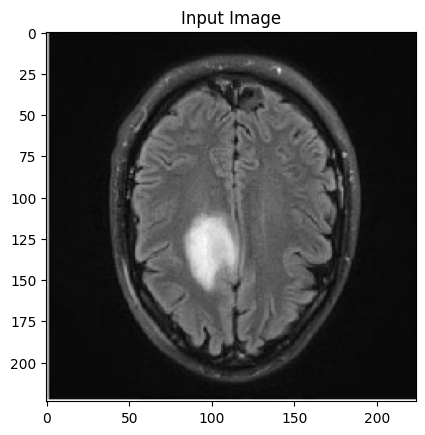

In [49]:
path="/content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1059).jpg"
img = load_img(path , target_size=(224,224))

i = img_to_array(img)/255
input_arr=np.array([i])

input_arr.shape

pred = np.argmax( model.predict(input_arr))

print(pred)

if pred<0.5:
  print("MRI is having a Tumor")
else:
  print("MRI is not having a Tumor")

# displaying the image
plt.imshow(input_arr[0])
plt.title("Input Image")
plt.show()